In [ ]:
pip install datasets torchvision matplotlib pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


FileNotFoundError: Couldn't find a dataset script at /content/oxford_flowers102/oxford_flowers102.py or any data file in the same directory. Couldn't find 'oxford_flowers102' on the Hugging Face Hub either: FileNotFoundError: Dataset 'oxford_flowers102' doesn't exist on the Hub. If the repo is private or gated, make sure to log in with `huggingface-cli login`.

100%|██████████| 345M/345M [00:13<00:00, 26.0MB/s]
100%|██████████| 502/502 [00:00<00:00, 592kB/s]
100%|██████████| 15.0k/15.0k [00:00<00:00, 22.5MB/s]


Total images: 1020
Number of classes: 102


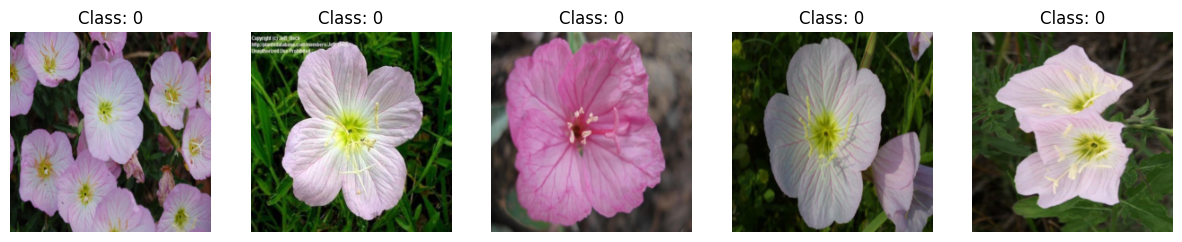

In [ ]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Download and load the Oxford 102 Flowers dataset
train_dataset = torchvision.datasets.Flowers102(
    root='./data',
    split='train',
    download=True,
    transform=transform
)

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Display class info
print(f"Total images: {len(train_dataset)}")
print(f"Number of classes: {len(set(train_dataset._labels))}")

# Show sample images with class labels
def show_samples(dataset, n=5):
    fig, axs = plt.subplots(1, n, figsize=(15, 3))
    for i in range(n):
        img, label = dataset[i]
        axs[i].imshow(np.transpose(img.numpy(), (1, 2, 0)))
        axs[i].set_title(f"Class: {label}")
        axs[i].axis("off")
    plt.show()

show_samples(train_dataset)
